In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Projet 4 : Panorama de l'état de la malnutrition dans le monde 

## I. Contexte

Il s'agit d'une analyse de 4 jeux de données provenant du site de la FAO, qui a pour objectif de donner une vue d'ensemble de l'état de la malnutrition dans le monde.

Données analysées: 
1. Un fichier de disponibilité alimentaire pour l’année 2017
2. Un fichier d’insécurité alimentaire
3. Un fichier de population 
4. Un fichier d'aide_alimentaire.

Provenance des données : http://www.fao.org/faostat/fr/#data



## II. Préparation des données

### 1. Fichier de disponibilité alimentaire
ce fichier contient les variable suivantes :
-	Le pays.
-	Le produit.
-	4 variables de disponibilité alimentaire. Ces 4 variables sont exprimées dans des unités bien spécifiques, qui sont précisées directement dans le nom de la variable. À noter cependant que la notation kcal est un abus de langage, elle correspond à une calorie réelle.
-	10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire. Elles sont toutes exprimées en milliers de tonnes.
-	Enfin, une variable type qui précise si le produit est d’origine animale ou végétale.

#### 1.1. Importation du fichier

Cette phase consiste à importer le dataframe.

In [2]:
dispo_alimentaire = pd.read_csv('dispo_alimentaire.csv', sep =',')

In [3]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [4]:
dispo_alimentaire.rename(columns={"Zone":"Pays"}, inplace=True)

#### 1.2. Inspection et nettoyage des données

Dans un premier temps, nous afficherons un aperçu rapide des cinq premières lignes du dataframe avec la méthode .head()afin de vérifier si l'importation s'est bien passée.

In [5]:
dispo_alimentaire.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


Nous allons ensuite renomer et convertir les unités de mésure en kg afin d'homogénéiser le dataframe.:

1 g/personne/jour = 0.001 kg*365/personne/an

1 000tonnes = 1 000 000 kg

Renommage des colonnes :

In [6]:
dispo_alimentaire.rename(columns={
     "Disponibilité de matière grasse en quantité (g/personne/jour)":"Disponibilité de matière grasse en quantité (kg/personne/an)",
     "Disponibilité de protéines en quantité (g/personne/jour)":"Disponibilité de protéines en quantité (kg/personne/an)"
}, inplace=True)

Conversion des unités de mésure :

In [7]:
conversion_dispo =  ["Disponibilité de matière grasse en quantité (kg/personne/an)", "Disponibilité de protéines en quantité (kg/personne/an)"]
for x in conversion_dispo:
    dispo_alimentaire[x] *=365*0.001
    
conversion_utilisation_acquisition = ["Disponibilité intérieure", "Aliments pour animaux", "Autres Utilisations", "Exportations - Quantité","Importations - Quantité", "Nourriture", "Pertes", "Production", "Semences","Traitement","Variation de stock"]
for x in conversion_utilisation_acquisition:
    dispo_alimentaire[x] *= 1000000
    

Ensuite, nous nous occuperons des cellules non renseignées (NaN) en les remplaçant par des 0

In [8]:
dispo_alimentaire.fillna(0, inplace=True)

Ensuite, nous procéderons à la vérification du type de chacune des variables de notre dataframe grâce à la méthode .dtypes

In [9]:
dispo_alimentaire.dtypes

Pays                                                             object
Produit                                                          object
Origine                                                          object
Aliments pour animaux                                           float64
Autres Utilisations                                             float64
Disponibilité alimentaire (Kcal/personne/jour)                  float64
Disponibilité alimentaire en quantité (kg/personne/an)          float64
Disponibilité de matière grasse en quantité (kg/personne/an)    float64
Disponibilité de protéines en quantité (kg/personne/an)         float64
Disponibilité intérieure                                        float64
Exportations - Quantité                                         float64
Importations - Quantité                                         float64
Nourriture                                                      float64
Pertes                                                          

Voici un dernier petit aperçu de notre dataframe.

In [10]:
dispo_alimentaire.head()

,Pays,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (kg/personne/an),Disponibilité de protéines en quantité (kg/personne/an),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.07300,0.28105,53000000.0,0.0,0.0,53000000.0,0.0,53000000.0,0.0,0.0,0.0
1,Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.00365,0.00730,41000000.0,2000000.0,40000000.0,39000000.0,2000000.0,3000000.0,0.0,0.0,0.0
2,Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.00365,0.01095,2000000.0,0.0,2000000.0,2000000.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.00730,0.01825,82000000.0,0.0,82000000.0,82000000.0,0.0,0.0,0.0,0.0,0.0


#### 1.3. Validation du dataframe

In [11]:
dispo_alimentaire.shape

(15605, 18)

In [12]:
dispo_alimentaire.size

280890

Le dataframe comporte 15605 lignes, 18 colonnes et 280890 éléments.

Tous les champs du dataframe sont bien typés.

Toutes les cellules Nan sont traitées.

Les unités de mésure sont uniformisées aussitôt que la conversion est possible.

Le dataframe est prêt!

### 2. Fichier d’insécurité alimentaire
Ce fichier contient les variables suivantes : 
- le pays.
- un intervalle d’années.
- le nombre de personnes en sous-alimentation en millions d’habitants.


#### 2.1. Importation du fichier

In [13]:
sous_nutrition = pd.read_csv('sous_nutrition.csv')

In [14]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [15]:
sous_nutrition = sous_nutrition.rename(columns={"Zone":"Pays", "Valeur":"Valeur_sous_nutrition"})

#### 2.2. Inspection et nettoyage des données

In [16]:
sous_nutrition.head()

,Pays,Année,Valeur_sous_nutrition
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [17]:
sous_nutrition.dtypes


Pays                     object
Année                    object
Valeur_sous_nutrition    object
dtype: object

La colonne Valeur_sous_nutrition est du type object. Afin de pouvoir faire des opérations avec les données de cette colonne, il sera nécessaire de modifier le type en numeric.

In [18]:
sous_nutrition["Valeur_sous_nutrition"] = pd.to_numeric(sous_nutrition["Valeur_sous_nutrition"], errors='coerce')

Ensuite, nous nous occuperons des cellules non renseignées (NaN) en les remplaçant par des 0

In [19]:
sous_nutrition["Valeur_sous_nutrition"].dtypes


dtype('float64')

In [20]:
sous_nutrition = sous_nutrition.fillna(0)

Préparation de la colonne Année:

In [21]:
sous_nutrition['Année'].replace(['2012-2014', '2013-2015', '2014-2016', '2015-2017', '2016-2018', '2017-2019'],[2013, 2014, 2015, 2016, 2017, 2018], inplace=True)

In [22]:
sous_nutrition['Année'] = sous_nutrition['Année'].astype('int')

Conversion de l'unité de mésure de la colonne Valeur_nutrition exprimée en millions d'habitants :

In [23]:
sous_nutrition["Valeur_sous_nutrition"] = sous_nutrition["Valeur_sous_nutrition"] * 1000000

In [24]:
sous_nutrition.head()

,Pays,Année,Valeur_sous_nutrition
0,Afghanistan,2013,8600000.0
1,Afghanistan,2014,8800000.0
2,Afghanistan,2015,8900000.0
3,Afghanistan,2016,9700000.0
4,Afghanistan,2017,10500000.0


In [25]:
sous_nutrition.dtypes

Pays                      object
Année                      int32
Valeur_sous_nutrition    float64
dtype: object

#### 2.3. Validation du dataframe

In [26]:
sous_nutrition.shape

(1218, 3)

In [27]:
sous_nutrition.size

3654

Le dataframe comporte 1218 lignes, 3 colonnes et 3654 éléments.

Tous les champs du dataframe sont bien typés.

Toutes les cellules Nan sont traitées.

Les unités de mésure sont uniformisées aussitôt que la conversion est possible.

Le dataframe est prêt!

### 3. Fichier de population

#### 3.1. Importation du fichier

In [28]:
population = pd.read_csv('population.csv')

In [29]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [30]:
population = population.rename(columns={"Zone":"Pays", "Valeur":"Valeur_population"})

#### 3.2. Inspection des données

In [31]:
population.head()

,Pays,Année,Valeur_population
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


Conversion de l'unité de mésure de la colonne Valeur_population exprimée en milliers d'habitants :

In [32]:
population["Valeur_population"] = population["Valeur_population"] * 1000

In [33]:
population.dtypes

Pays                  object
Année                  int64
Valeur_population    float64
dtype: object

In [34]:
population.shape

(1416, 3)

In [35]:
population.head()

,Pays,Année,Valeur_population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0


Le dataframe est bien chargé avec 1416 lignes et 3 colonnes.
De plus, tous les champs qui le composent sont bien typés.

### 4. Fichier d’aide alimentaire

#### 4.1. Importation du fichier

In [36]:
aide_alimentaire = pd.read_csv('aide_alimentaire.csv')

In [37]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [38]:
aide_alimentaire = aide_alimentaire.rename(columns={"Valeur":"Quantité_aide", "Pays bénéficiaire":"Pays"})

In [39]:
aide_alimentaire["Quantité_aide"] = aide_alimentaire["Quantité_aide"] * 1000

#### 4.2. Inspection des données

In [40]:
aide_alimentaire.head()

,Pays,Année,Produit,Quantité_aide
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


In [41]:
aide_alimentaire.dtypes

Pays             object
Année             int64
Produit          object
Quantité_aide     int64
dtype: object

In [42]:
aide_alimentaire.shape

(1475, 4)

In [43]:
aide_alimentaire.head()

,Pays,Année,Produit,Quantité_aide
0,Afghanistan,2013,Autres non-céréales,682000
1,Afghanistan,2014,Autres non-céréales,335000
2,Afghanistan,2013,Blé et Farin,39224000
3,Afghanistan,2014,Blé et Farin,15160000
4,Afghanistan,2013,Céréales,40504000


Le dataframe est bien chargé avec 1475 lignes et 4 colonnes.
De plus, tous les champs qui le composent sont bien typés.

## III. Les demandes de Marc

In [108]:
population.loc[population["Année"]==2017, ["Pays","Année","Valeur_population"]]

,Pays,Année,Valeur_population
4,Afghanistan,2017,36296113.0
10,Afrique du Sud,2017,57009756.0
16,Albanie,2017,2884169.0
22,Algérie,2017,41389189.0
28,Allemagne,2017,82658409.0
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402484.0
1396,Viet Nam,2017,94600648.0
1402,Yémen,2017,27834819.0
1408,Zambie,2017,16853599.0


### 1. La proportion de personnes en état de sous-nutrition sur 2017

In [44]:
sousnutri_pop_2017 = pd.merge(population.loc[population["Année"]==2017, ["Pays","Année","Valeur_population"]], 
                              sous_nutrition.loc[sous_nutrition["Année"]==2017, ["Pays","Valeur_sous_nutrition"]], on="Pays")

In [114]:
sousnutri_pop_2017.head()

,Pays,Année,Valeur_population,Valeur_sous_nutrition
0,Afghanistan,2017,36296113.0,10500000.0
1,Afrique du Sud,2017,57009756.0,3100000.0
2,Albanie,2017,2884169.0,100000.0
3,Algérie,2017,41389189.0,1300000.0
4,Allemagne,2017,82658409.0,0.0


In [113]:
round((sousnutri_pop_2017["Valeur_sous_nutrition"].sum() / sousnutri_pop_2017["Valeur_population"].sum())*100, 2)

7.1

La proportion de personnes en état de sous-nutrition en 2017 est de 7,1 %


### 2. Le nombre théorique de personnes qui pourraient être nourries.

On commence par calculer la disponibilité alimentaire mondiale:

In [47]:
all_products = pd.merge((dispo_alimentaire[["Pays","Disponibilité alimentaire (Kcal/personne/jour)"]]), 
                        (population.loc[population["Année"]==2017, ["Pays","Valeur_population"]]), on="Pays", how="left")

In [48]:
all_products["dispo_par_pays"] = all_products["Disponibilité alimentaire (Kcal/personne/jour)"] * all_products["Valeur_population"]

In [49]:
all_products.head()

,Pays,Disponibilité alimentaire (Kcal/personne/jour),Valeur_population,dispo_par_pays
0,Afghanistan,5.0,36296113.0,181480565.0
1,Afghanistan,1.0,36296113.0,36296113.0
2,Afghanistan,1.0,36296113.0,36296113.0
3,Afghanistan,0.0,36296113.0,0.0
4,Afghanistan,4.0,36296113.0,145184452.0


In [50]:
dispo_mondiale = all_products["dispo_par_pays"].sum()


In [51]:
dispo_mondiale


20918984627331.0

Avec une consommation alimentaire moyenne mondiale est de 2500 kcalories par personne par jour, on aura:

In [52]:
round(dispo_mondiale / 2500,2)

8367593850.93

Le nombre théorique de personnes qui pourraient être nourries est de 8 367 593 850.93

La population mondiale est 7 milliards  de personne environ. 

Nous disposons donc théoriquement assez de disponibilité alimentaire pour nourrir toute la planète.

### 3. Le nombre théorique de personnes qui pourraient être nourries en fonction de la disponibilité alimentaire d'origine végétale.

In [53]:
vegetale = pd.merge((dispo_alimentaire[["Pays","Produit", "Origine","Disponibilité alimentaire (Kcal/personne/jour)"]]), 
                    (population.loc[population["Année"]==2017, ["Pays","Valeur_population"]]), on="Pays")

In [54]:
vegetale = vegetale[vegetale["Origine"]=="vegetale"]

In [55]:
vegetale["dispo_pays"] = vegetale["Disponibilité alimentaire (Kcal/personne/jour)"]*vegetale["Valeur_population"]

In [56]:
vegetale.head(10)

,Pays,Produit,Origine,Disponibilité alimentaire (Kcal/personne/jour),Valeur_population,dispo_pays
1,Afghanistan,"Agrumes, Autres",vegetale,1.0,36296113.0,3.629611e+07
2,Afghanistan,Aliments pour enfants,vegetale,1.0,36296113.0,3.629611e+07
3,Afghanistan,Ananas,vegetale,0.0,36296113.0,0.000000e+00
4,Afghanistan,Bananes,vegetale,4.0,36296113.0,1.451845e+08
6,Afghanistan,Bière,vegetale,0.0,36296113.0,0.000000e+00
7,Afghanistan,Blé,vegetale,1369.0,36296113.0,4.968938e+10
8,Afghanistan,Boissons Alcooliques,vegetale,0.0,36296113.0,0.000000e+00
9,Afghanistan,Café,vegetale,0.0,36296113.0,0.000000e+00
10,Afghanistan,Coco (Incl Coprah),vegetale,0.0,36296113.0,0.000000e+00
12,Afghanistan,"Céréales, Autres",vegetale,0.0,36296113.0,0.000000e+00


In [57]:
nbr_theorique = round((vegetale["dispo_pays"].sum())/ 2500, 2)

In [58]:
nbr_theorique

6904305684.6

Le nombre théorique de personnes qui pourraient être nourries en fonction de la disponibilité alimentaire d'origine végétale est de 6 904 305 684.6

Les 

### 4. L’utilisation de la disponibilité intérieure

In [59]:
# acquisitions =  ("Importations - Quantité") - ("Exportations - Quantité") + ("Production") + ("Variation de stock")
# utilisations = ("Aliments pour animaux") + ("Autres Utilisations") + ("Nourriture") + ("Pertes") + ("Semences") + ("Traitement")
# acquisitions = Disponibilité intérieure = utilisations
acquisitions = ["Exportations - Quantité", "Importations - Quantité","Production", "Variation de stock"]
utilisations = ["Aliments pour animaux", "Autres Utilisations", "Nourriture", "Pertes", "Semences", "Traitement"]

In [60]:
proportion_utilisation = dispo_alimentaire[["Aliments pour animaux", "Autres Utilisations", "Nourriture", "Pertes", "Semences", "Traitement", "Disponibilité intérieure"]].copy()

In [61]:
proportion_utilisation.head()

,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement,Disponibilité intérieure
0,0.0,0.0,53000000.0,0.0,0.0,0.0,53000000.0
1,0.0,0.0,39000000.0,2000000.0,0.0,0.0,41000000.0
2,0.0,0.0,2000000.0,0.0,0.0,0.0,2000000.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,82000000.0,0.0,0.0,0.0,82000000.0


#### Calcul des proportions

In [62]:
utilisation_animale = ((proportion_utilisation["Aliments pour animaux"].sum())/ (proportion_utilisation["Disponibilité intérieure"].sum()))*100

In [63]:
round(utilisation_animale, 2)

13.24

La proportion de la disponibilité destinée à l'alimentation des animaux est de : 13.24 %

In [64]:
utilisation_humaine = ((proportion_utilisation["Nourriture"].sum())/ (proportion_utilisation["Disponibilité intérieure"].sum()))*100

In [65]:
round(utilisation_humaine, 2)

49.51

La proportion de la disponibilité destinée à l'alimentation humaine est de : 49.51 %

In [66]:
utilisation_perdue = ((proportion_utilisation["Pertes"].sum())/ (proportion_utilisation["Disponibilité intérieure"].sum()))*100

In [67]:
round(utilisation_perdue, 2)

4.61

La proportion de la disponibilité qui est perdue de : 4.61 %

In [68]:
nourriture_autres = ((proportion_utilisation["Autres Utilisations"].sum() + proportion_utilisation["Semences"].sum() + proportion_utilisation["Traitement"].sum())/ (proportion_utilisation["Disponibilité intérieure"].sum()))*100

In [69]:
round(nourriture_autres, 2)

32.74

##### Vérification

In [70]:
verification_utilisation = utilisation_humaine + utilisation_animale + utilisation_perdue + nourriture_autres 

In [71]:
verification_utilisation

100.097451577288

Ce résultat confirme notre formule : la somme des utilisations est égale à la disponibilité intérieure.

##### Représentation graphique

In [72]:
liste_proportion_utilisations = [utilisation_humaine, utilisation_animale, utilisation_perdue, nourriture_autres]

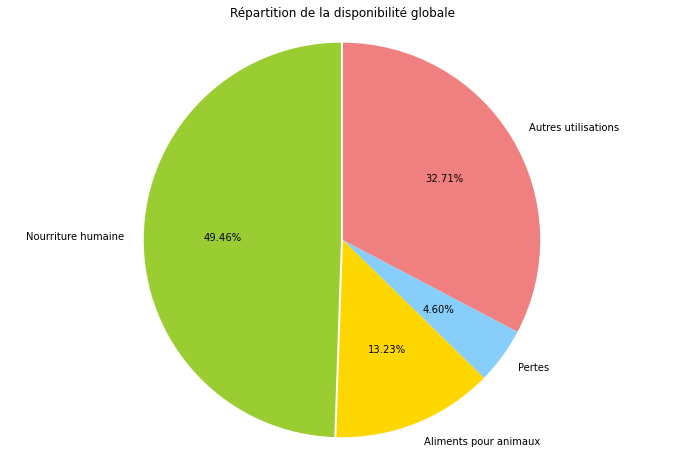

In [73]:
plt.figure(figsize=(12,8))
plt.title("Répartition de la disponibilité globale")

labels = "Nourriture humaine", "Aliments pour animaux", "Pertes", "Autres utilisations"
colors = ['yellowgreen', 'gold', 'lightskyblue','lightcoral' ]
explode = [0.01,0,0,0]

plt.pie(x=liste_proportion_utilisations,labels=labels, colors=colors, autopct='%1.2f%%', startangle=90, explode=explode)

plt.axis('equal')

plt.savefig('PieChart01.png')

## III. Les demandes de Mélanie

### 1. Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [74]:
sousnutri_par_pays = sousnutri_pop_2017.copy()

In [75]:
sousnutri_par_pays["Personnes en sous nutrition en 2017 (en %)"] = (sousnutri_par_pays["Valeur_sous_nutrition"] /sousnutri_par_pays["Valeur_population"])*100

In [76]:
sousnutri_par_pays.sort_values(by="Personnes en sous nutrition en 2017 (en %)", ascending = False, inplace=True)

In [77]:
round(sousnutri_par_pays.head(10),2)

,Pays,Année,Valeur_population,Valeur_sous_nutrition,Personnes en sous nutrition en 2017 (en %)
78,Haïti,2017,10982366.0,5300000.0,48.26
157,République populaire démocratique de Corée,2017,25429825.0,12000000.0,47.19
108,Madagascar,2017,25570512.0,10500000.0,41.06
103,Libéria,2017,4702226.0,1800000.0,38.28
100,Lesotho,2017,2091534.0,800000.0,38.25
183,Tchad,2017,15016753.0,5700000.0,37.96
161,Rwanda,2017,11980961.0,4200000.0,35.06
121,Mozambique,2017,28649018.0,9400000.0,32.81
186,Timor-Leste,2017,1243258.0,400000.0,32.17
0,Afghanistan,2017,36296113.0,10500000.0,28.93


### 2. Les pays qui ont le plus bénéficié d’aide depuis 2013

In [78]:
pays_aide_alim = aide_alimentaire.copy().groupby("Pays").sum()

In [79]:
pays_aide_alim.sort_values(by="Quantité_aide", ascending = False, inplace=True)

In [80]:
 pays_aide_alim.head(10)

,Année,Quantité_aide
Pays,,
République arabe syrienne,76543,1858943000
Éthiopie,66460,1381294000
Yémen,76553,1206484000
Soudan du Sud,44309,695248000
Soudan,48335,669784000
Kenya,54376,552836000
Bangladesh,50347,348188000
Somalie,54377,292678000
République démocratique du Congo,50350,288502000


### 3. Les pays qui ont le plus/le moins de disponibilité/habitant

In [81]:
dispo_par_habitant = dispo_alimentaire[["Pays","Disponibilité alimentaire (Kcal/personne/jour)"]]

In [82]:
dispo_par_habitant = dispo_par_habitant.groupby("Pays").sum()

#### 3.1 Les pays qui ont le plus de disponibilité/habitant

In [83]:
desc_dispo_par_habitant = dispo_par_habitant.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending = False)

In [84]:
desc_dispo_par_habitant.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


#### 3.2 Les pays qui ont le moins de disponibilité/habitant

In [85]:
asc_dispo_par_habitant = dispo_par_habitant.sort_values(by="Disponibilité alimentaire (Kcal/personne/jour)", ascending = True)

In [86]:
asc_dispo_par_habitant.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


## IV. Les remarques de Julien

### 1. Utilisation des céréales

In [87]:
liste_cereales = ["Blé", "Maïs", "Riz (Eq Blanchi)", "Orge", "Seigle", "Avoine", "Millet", "Sorgho", "Céréales, Autres"]

In [88]:
cereales = dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(liste_cereales), ["Produit","Aliments pour animaux", "Autres Utilisations", "Nourriture", "Pertes", "Semences", "Traitement","Disponibilité intérieure"]].copy()

In [89]:
cereales.head()

,Produit,Aliments pour animaux,Autres Utilisations,Nourriture,Pertes,Semences,Traitement,Disponibilité intérieure
7,Blé,0.0,0.0,4.895000e+09,775000000.0,322000000.0,0.0,5.992000e+09
12,"Céréales, Autres",0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
32,Maïs,200000000.0,0.0,7.600000e+07,31000000.0,5000000.0,0.0,3.130000e+08
34,Millet,0.0,0.0,1.200000e+07,1000000.0,0.0,0.0,1.300000e+07
40,Orge,360000000.0,0.0,8.900000e+07,52000000.0,22000000.0,0.0,5.240000e+08


#### Calcul des proportions

In [90]:
cereales_animaux = (cereales["Aliments pour animaux"].sum() / cereales["Disponibilité intérieure"].sum()) * 100

In [91]:
round(cereales_animaux,2)

36.29

In [92]:
cereales_humain = (cereales["Nourriture"].sum() / cereales["Disponibilité intérieure"].sum()) * 100

In [93]:
round(cereales_humain, 2)

42.75

In [94]:
cereales_autres = ((cereales["Autres Utilisations"].sum() + cereales["Traitement"].sum() + cereales["Semences"].sum()) / cereales["Disponibilité intérieure"].sum()) * 100

In [95]:
round(cereales_autres, 2)

16.53

In [96]:
cereales_pertes = (cereales["Pertes"].sum() / cereales["Disponibilité intérieure"].sum()) * 100

In [97]:
round(cereales_pertes, 2)

4.45

##### Vérification

In [98]:
cereales_animaux + cereales_humain + cereales_pertes + cereales_autres

100.02409639555312

##### Représentation graphique

In [99]:
liste_cereales_utilisations = [cereales_humain, cereales_animaux, cereales_pertes, cereales_autres]

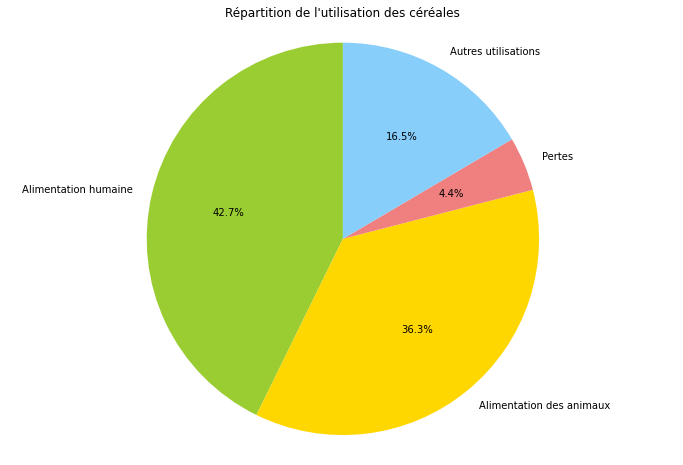

In [100]:
plt.figure(figsize=(12,8))
plt.title("Répartition de l'utilisation des céréales")

labels = "Alimentation humaine", "Alimentation des animaux", "Pertes", "Autres utilisations"
colors = ['yellowgreen', 'gold', 'lightcoral', 'lightskyblue']

plt.pie(x=liste_cereales_utilisations,labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')

plt.savefig('PieChart02.png')

### 2. L'utilisation du manioc par la Thaïlande

#### 2.1 Rapport production/exportation

In [101]:
manioc_thai = dispo_alimentaire.loc[(dispo_alimentaire["Produit"]=="Manioc") & (dispo_alimentaire["Pays"]=="Thaïlande"), 
                                    ["Pays", "Produit","Disponibilité intérieure","Production", "Exportations - Quantité"]].copy() 

In [102]:
manioc_thai["proportion_prod_export (en %)"] = round((manioc_thai["Exportations - Quantité"]/ manioc_thai["Production"])* 100, 2)

In [103]:
manioc_thai.head()

,Pays,Produit,Disponibilité intérieure,Production,Exportations - Quantité,proportion_prod_export (en %)
13809,Thaïlande,Manioc,6.264000e+09,3.022800e+10,2.521400e+10,83.41


83, 41 % de la production du manioc est exportée.

#### 2.1. Proportion des personnes en sous_nutrition en Thaïlande

In [104]:
sousnutri_pop_thai_2017 = sousnutri_pop_2017[sousnutri_pop_2017["Pays"]=="Thaïlande"].copy()

In [105]:
sousnutri_pop_thai_2017["Proportion_sous_nutrition_Thaïlande (en %)"] = round((sousnutri_pop_thai_2017["Valeur_sous_nutrition"] / sousnutri_pop_thai_2017["Valeur_population"]) * 100, 2)

In [106]:
sousnutri_pop_thai_2017

,Pays,Année,Valeur_population,Valeur_sous_nutrition,Proportion_sous_nutrition_Thaïlande (en %)
185,Thaïlande,2017,69209810.0,6200000.0,8.96


8,96% de la population du pays est sous_alimentée.

#### 2.3. Conclusion

La thaïlande a produit plus de 30 milliards de kilogrammes de manioc (en 2017) et 83,41 % cette production a été exportée.  1kg de manioc apporte entre 1250 et  1400 kcal.

Une meilleure stratégie sur l'exportation et l'utilisation de ce produit permettra d'améliorer l'état de la malnutrition qui représente 8,96% de la population du pays.


Il est important de noter que la Thaïlande est le pays le plus inégalitaire dans le monde selon le rapport 2018 publié par le Crédit Suisse.

Selon les conclusions du rapport 2018 Global Wealth Databook 2018 les statistiques compilée par Credit Suisse dans 40 pays montrent que les 1% des Thaïlandais les plus riches contrôlent 66,9% des richesses du pays.
